# Multi-Class Logistic Regression on Iris Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\ML\iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

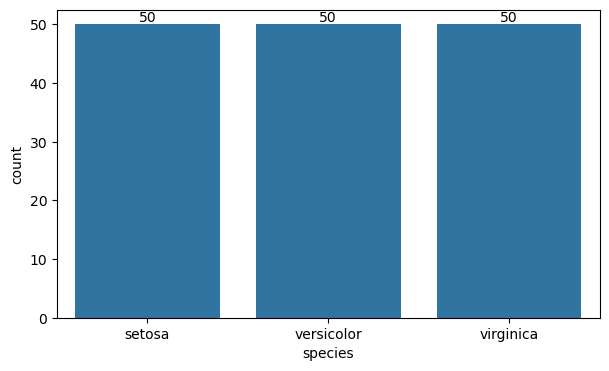

In [7]:
ax = sns.countplot(data = df, x ='species')
ax.bar_label(ax.containers[0]);

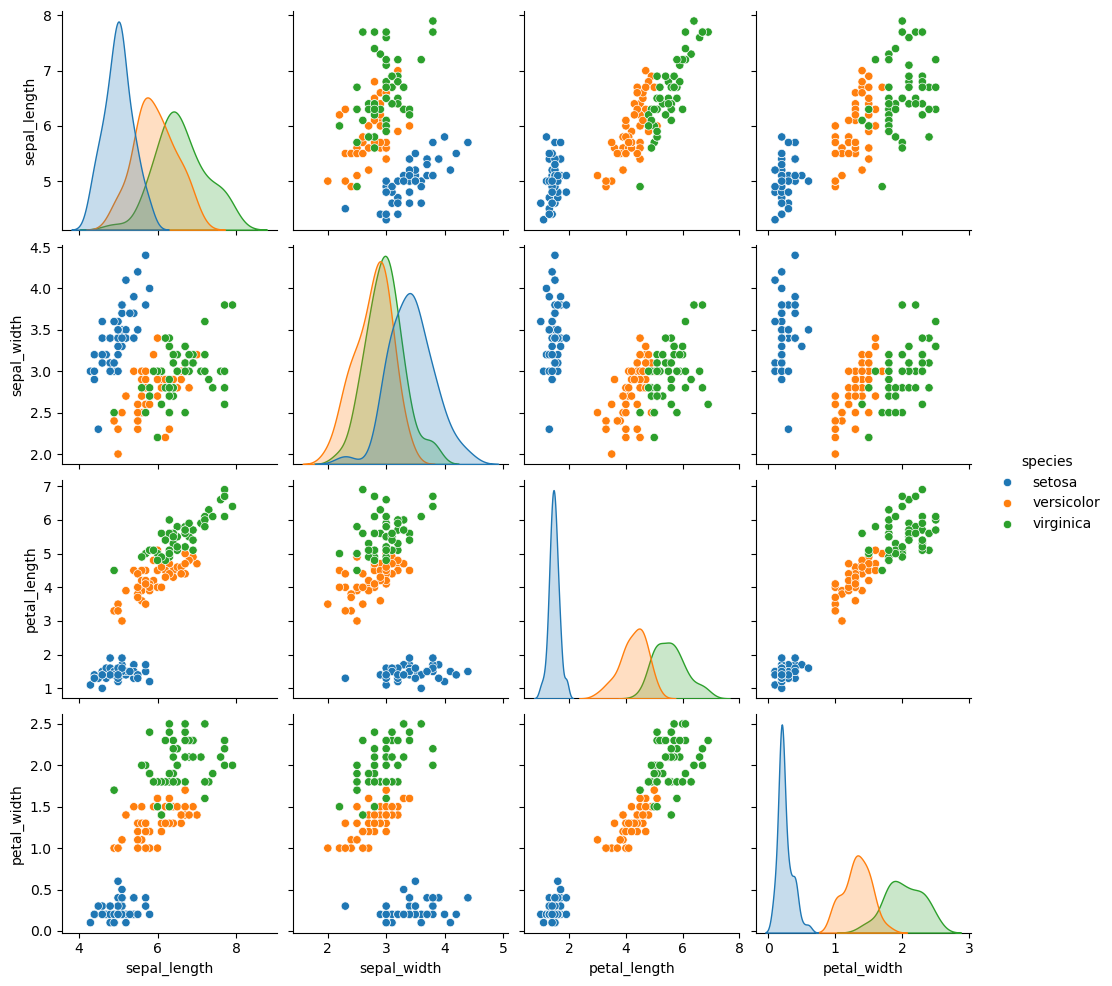

In [8]:
sns.pairplot(df,hue='species');

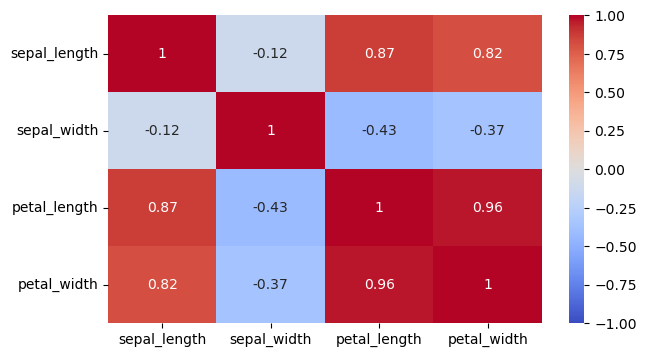

In [11]:
sns.heatmap(df.corr(numeric_only=True),vmin=-1, vmax=1, annot=True, cmap="coolwarm");

## Train | Test Split and Modeling

In [12]:
X = df.drop('species',axis=1)
y = df['species']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# You can use stratify=y whether your data is inbalanced or balanced.
# But you should definitely use inbalanced data, since the data is balanced, we didn't feel the need to use it here.

In [15]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

## Model Performance

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### With Default Parameters

In [17]:
y_pred = pipe_model.predict(X_test)
y_pred

# target can be numeric data or object data.

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [18]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

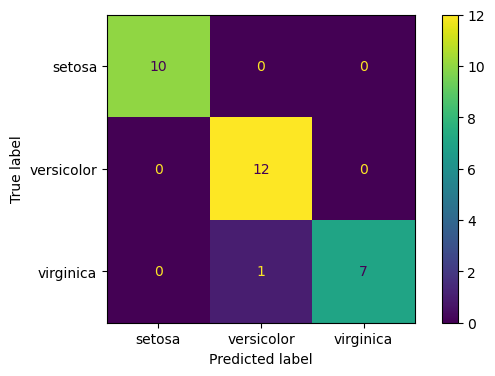

In [19]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [20]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [21]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# In multiclass classification problems, if all classes have the same importance
# It will be more accurate to evaluate the results according to macro, weighted or accuracy scores.

# macro avg: treats all classes equally.
# If we want the scores of the class with more observations to come to the fore, weighted avg is used.

# micro_scores are equal to accuracy. It can be used if the data is balanced.

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Cross Validate

In [22]:
from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# We do not use precision, recall and f1 metrics alone for CV or gridsearchCV in multiclass data.
# As it is stated above, precision_weighted, precision_macro, precision_micro etc.
# Otherwise you will get an error. If we want to see the CV scores of a single class specifically,
# we should use the make_scorer function as shown below.

test_accuracy               0.950000
train_accuracy              0.963889
test_precision_weighted     0.960000
train_precision_weighted    0.964076
test_recall_weighted        0.950000
train_recall_weighted       0.963889
test_f1_weighted            0.949206
train_f1_weighted           0.963872
dtype: float64

### Cross Validate for versicolar

In [23]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])


scoring = {"f1_versicolor":f1_versicolor,
           "precision_versicolor":precision_versicolor,
           "recall_versicolor":recall_versicolor}

# In multiclass data, you can get CV scores on whatever your target label is.
# Again we have to use the make_scorer function.
# When the data is multi-class, average, and labels parameters must be specified in the make_scorer function.
# Label names should be given as a list.
# If we are defining a scorer for a single class, average: None should be set.

In [24]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

#no overfitting

test_f1_versicolor            0.923810
train_f1_versicolor           0.942656
test_precision_versicolor     0.940000
train_precision_versicolor    0.949885
test_recall_versicolor        0.925000
train_recall_versicolor       0.935798
dtype: float64

## Class prediction

In [25]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

# 0.5 threshold is not sought in multiclass data. Whichever class has the highest probability it is assigned to that class.

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
50,7.0,3.2,4.7,1.4,versicolor,versicolor,0.009149,0.851715,1.391362e-01
33,5.5,4.2,1.4,0.2,setosa,setosa,0.997575,0.002425,1.542935e-08
90,5.5,2.6,4.4,1.2,versicolor,versicolor,0.021576,0.894022,8.440129e-02
64,5.6,2.9,3.6,1.3,versicolor,versicolor,0.099521,0.865612,3.486680e-02
80,5.5,2.4,3.8,1.1,versicolor,versicolor,0.018558,0.948111,3.333184e-02
32,5.2,4.1,1.5,0.1,setosa,setosa,0.997950,0.002050,1.076626e-08
42,4.4,3.2,1.3,0.2,setosa,setosa,0.984541,0.015459,2.471313e-07
31,5.4,3.4,1.5,0.4,setosa,setosa,0.940318,0.059680,2.226063e-06
127,6.1,3.0,4.9,1.8,virginica,virginica,0.005718,0.389264,6.050179e-01
134,6.1,2.6,5.6,1.4,virginica,versicolor,0.001277,0.511730,4.869928e-01


### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [26]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]

model = Pipeline(steps=operations)

In [27]:
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(max_iter=5000))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(max_iter=5000),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 5000,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [28]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

In [29]:
grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, return_train_score=True)

#scoring = f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])

# scoring is accuracy by default in the classification. If we want to improve the metrics of a particular class,
# we should define the make_scorer function as the scoring parameter above.

# If we wanted the model to find the best parameters to improve the f1_score of the versicolor class make scorer would be
# scoring = make_scorer(f1_score, average = None, labels =["versicolor"])

In [30]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True)

In [31]:
grid_model.best_params_

{'logistic__C': 19, 'logistic__penalty': 'l2'}

In [32]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=19, max_iter=5000))])

In [33]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score       0.975
mean_train_score    0.98125
Name: 11, dtype: object

In [34]:
y_pred = grid_model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

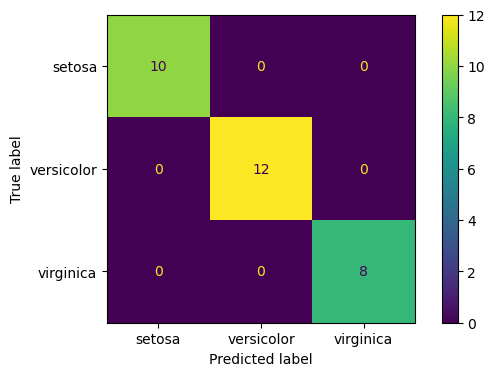

In [35]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [36]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [37]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [40]:
# We have a multi-class classification problem with 3 classes (e.g., ‘setosa’, ‘versicolor’, ‘virginica’).
# We trained a grid search model (grid_model) that predicts the class probabilities for each class.
# Now we want to create an ROC curve for this multi-class problem using RocCurveDisplay.from_estimator().
# However, this function is designed for binary classifiers (i.e., models that distinguish between two classes), not multi-class classifiers.
# So the codes below will not work for multiclass data. It gives an error.


# RocCurveDisplay.from_estimator(grid_model, X_test, y_test);
# PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);
# plot_roc_curve or precision_recall_curve

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [41]:
# conda install -c conda-forge scikit-plot
!pip install scikit-plot

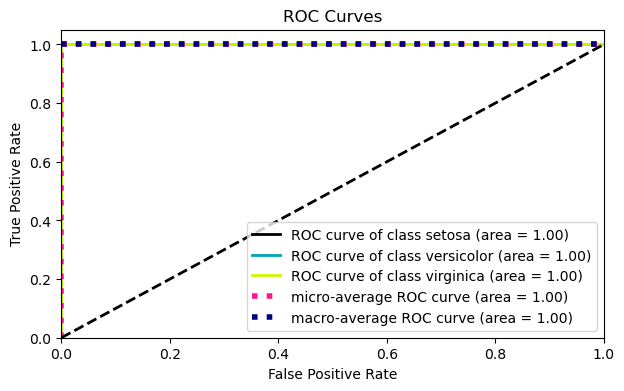

In [42]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [43]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])  # roc_auc score  for setosa

1.0

In [44]:
y_test[:5]

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
Name: species, dtype: object

In [45]:
y_test_dummies[:5]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False]])

## Precision Recall Curve

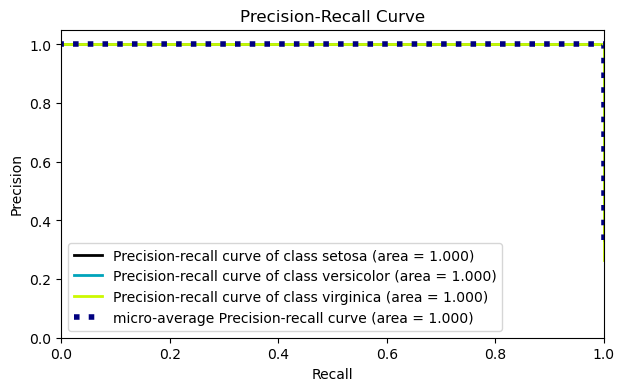

In [46]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [47]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

1.0

## Final Model and Model Deployment

In [48]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [49]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [50]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [51]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [52]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [53]:
sample = pd.DataFrame(my_dict)
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [54]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [55]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,setosa,0.712393,0.287603,0.000004
1,5.8,3.0,4.3,1.3,versicolor,0.044001,0.890134,0.065864
2,7.5,4.2,6.5,2.3,virginica,0.000085,0.020543,0.979372


END OF THE PROJECT